In [1]:
from google.colab import drive
drive.mount('/content/MyDrive')
import pandas as pd
import numpy as np

Mounted at /content/MyDrive


In [76]:
df = pd.read_csv('/content/MyDrive/MyDrive/roy/players_season.csv')
print(df.head())

   id  player_id  season  club_id  squad  appearance  point_per_goal  goals  \
0 NaN     305686    2022      NaN   33.0        24.0            1.58    NaN   
1 NaN     305686    2021      NaN    1.0         0.0            0.00    NaN   
2 NaN     305686    2021      NaN   25.0        22.0            1.41    1.0   
3 NaN     305686    2020      NaN    3.0         2.0            0.00    NaN   
4 NaN     305686    2020      NaN    2.0         2.0            1.50    NaN   

   assits  own_goals  ...  goals_conceded  clean_sheets  minutes_per_goal  \
0     NaN        NaN  ...             NaN           NaN               NaN   
1     NaN        NaN  ...             NaN           NaN               NaN   
2     NaN        NaN  ...             NaN           NaN             809.0   
3     NaN        NaN  ...             NaN           NaN               NaN   
4     NaN        NaN  ...             NaN           NaN               NaN   

   minutes_played       competition   age          position  H

In [77]:
df.drop(df.columns[[0,2,3,4,6,10,11,12,16,17,18,20,22,23]], axis=1, inplace=True)
print(df.head())

   player_id  appearance  goals  assits  own_goals  penalty_goals  \
0     305686        24.0    NaN     NaN        NaN            NaN   
1     305686         0.0    NaN     NaN        NaN            NaN   
2     305686        22.0    1.0     NaN        NaN            NaN   
3     305686         2.0    NaN     NaN        NaN            NaN   
4     305686         2.0    NaN     NaN        NaN            NaN   

   goals_conceded  clean_sheets   age  Height  
0             NaN           NaN  25.0   185.0  
1             NaN           NaN  25.0   185.0  
2             NaN           NaN  25.0   185.0  
3             NaN           NaN  25.0   185.0  
4             NaN           NaN  25.0   185.0  


In [78]:
df.isna().sum()

player_id              0
appearance             0
goals             175362
assits            189270
own_goals         252330
penalty_goals     244923
goals_conceded    237765
clean_sheets      242936
age                  328
Height              4984
dtype: int64

In [79]:
df['goals'] = df['goals'].fillna(0)
df['assits'] = df['assits'].fillna(0)
df['own_goals'] = df['own_goals'].fillna(0)
df['penalty_goals'] = df['penalty_goals'].fillna(0)
df['goals_conceded'] = df['goals_conceded'].fillna(0)
df['clean_sheets'] = df['clean_sheets'].fillna(0)
df['age'] = df['age'].fillna(0)
df['Height'] = df['Height'].fillna(0)

In [19]:
F_data = df.groupby('player_id').agg({'appearance': 'sum', 'goals': 'sum', 'assits': 'sum','assits': 'sum','own_goals': 'sum','penalty_goals': 'sum','goals_conceded': 'sum','clean_sheets': 'sum','age': 'max','Height': 'max'})
print(F_data.head())

           appearance  goals  assits  own_goals  penalty_goals  \
player_id                                                        
10              668.0  258.0   134.0        1.0           11.0   
26              551.0    0.0     0.0        2.0            0.0   
80              322.0    0.0     0.0        0.0            0.0   
132             512.0   65.0    81.0        0.0            4.0   
215             714.0  204.0    56.0        0.0            1.0   

           goals_conceded  clean_sheets   age  Height  
player_id                                              
10                    0.0           0.0  44.0   184.0  
26                  642.0         174.0  42.0   190.0  
80                  411.0          94.0  42.0   194.0  
132                   0.0           0.0  42.0   179.0  
215                   0.0           0.0  41.0   193.0  


In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(F_data), columns=F_data.columns)
print(df_normalized.head())

   appearance     goals    assits  own_goals  penalty_goals  goals_conceded  \
0    0.685832  0.360839  0.395280   0.090909       0.082090        0.000000   
1    0.565708  0.000000  0.000000   0.181818       0.000000        0.673662   
2    0.330595  0.000000  0.000000   0.000000       0.000000        0.431270   
3    0.525667  0.090909  0.238938   0.000000       0.029851        0.000000   
4    0.733060  0.285315  0.165192   0.000000       0.007463        0.000000   

   clean_sheets   age    Height  
0      0.000000  0.88  0.893204  
1      0.406542  0.84  0.922330  
2      0.219626  0.84  0.941748  
3      0.000000  0.84  0.868932  
4      0.000000  0.82  0.936893  


In [81]:
df_normalized.isna().sum()

appearance        0
goals             0
assits            0
own_goals         0
penalty_goals     0
goals_conceded    0
clean_sheets      0
age               0
Height            0
dtype: int64

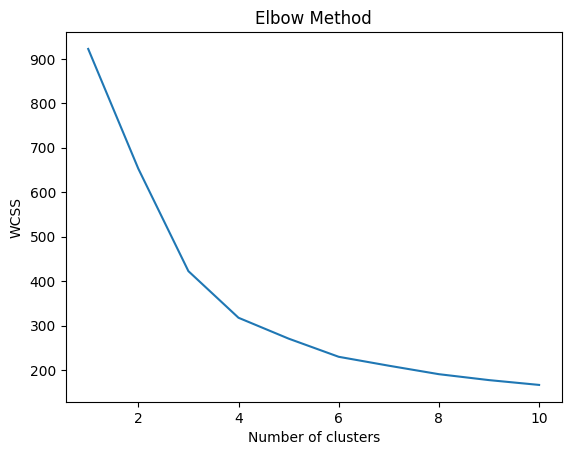

In [82]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)

# رسم نمودار Elbow
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [84]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(df_normalized)

silhouette_avg = silhouette_score(df_normalized, y_kmeans)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.4330999945199863


In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_normalized)

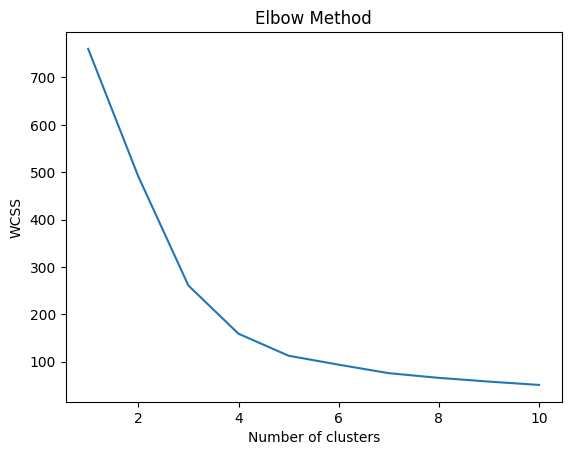

In [86]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# رسم نمودار Elbow
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [87]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_pca)

silhouette_avg = silhouette_score(X_pca, y_kmeans)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.7214950498321061


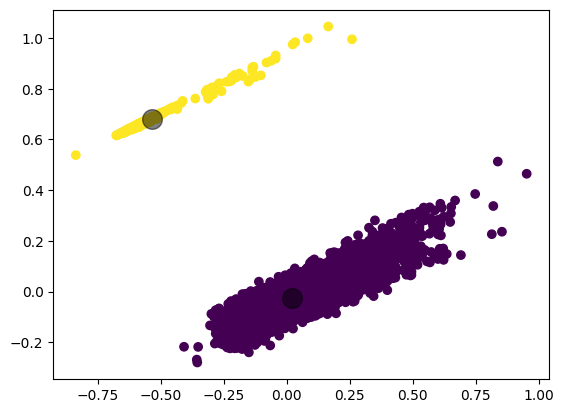

In [88]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [89]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_pca)

silhouette_avg = silhouette_score(X_pca, y_kmeans)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.507480894757556


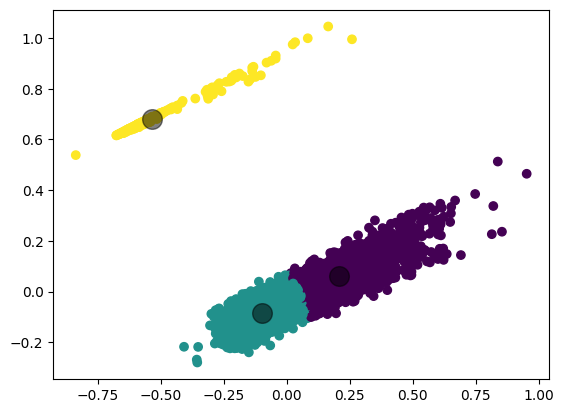

In [90]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [91]:
df1 = pd.read_csv('/content/MyDrive/MyDrive/roy/players_season.csv')

df1.drop(df1.columns[[0,2,3,4,6,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]], axis=1, inplace=True)
print(df1.head())

   player_id  appearance  goals  assits
0     305686        24.0    NaN     NaN
1     305686         0.0    NaN     NaN
2     305686        22.0    1.0     NaN
3     305686         2.0    NaN     NaN
4     305686         2.0    NaN     NaN


In [92]:
df1['goals'] = df1['goals'].fillna(0)
df1['assits'] = df1['assits'].fillna(0)

In [93]:
df1['Goal_Assit'] = df1['goals'] + df1['assits']

df1.drop(['goals', 'assits'], axis=1, inplace=True)

print(df1.head())

   player_id  appearance  Goal_Assit
0     305686        24.0         0.0
1     305686         0.0         0.0
2     305686        22.0         1.0
3     305686         2.0         0.0
4     305686         2.0         0.0


In [94]:
F_data1 = df1.groupby('player_id').agg({'appearance': 'sum', 'Goal_Assit': 'sum'})
print(F_data1.head())

           appearance  Goal_Assit
player_id                        
10              668.0       392.0
26              551.0         0.0
80              322.0         0.0
132             512.0       146.0
215             714.0       260.0


In [95]:
df_normalized1 = pd.DataFrame(scaler.fit_transform(F_data1), columns=F_data1.columns)
print(df_normalized1.head())

   appearance  Goal_Assit
0    0.685832    0.374046
1    0.565708    0.000000
2    0.330595    0.000000
3    0.525667    0.139313
4    0.733060    0.248092


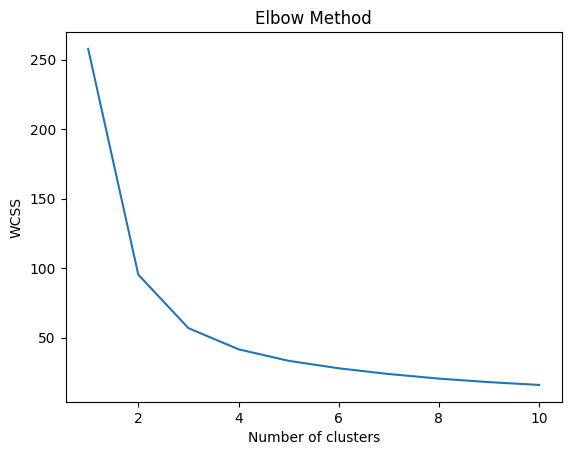

In [96]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_normalized1)
    wcss.append(kmeans.inertia_)

# رسم نمودار Elbow
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [97]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans1 = kmeans.fit_predict(df_normalized1)

silhouette_avg = silhouette_score(df_normalized1, y_kmeans1)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.46092689604569753


In [99]:
print(y_kmeans1)

[3 3 0 ... 1 1 1]


In [98]:
plt.scatter(df_normalized1[:, 0], df_normalized1[:, 1], c=y_kmeans1, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

InvalidIndexError: ignored